In [ ]:
#Importar paquetes de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial 
import plotly.express as px
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime

In [ ]:
#Importar datos desde drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Problema de negocio:**

**Se busca predecir el tiempo de estancia promedio de un paciente perteneciente a la población crónica que ingresa bajo la modalidad de pago global prospectivo (PGP) al Hospital Alma Máter de Antioquia, con el fin de asegurar las mejores condiciones de salud posibles, buscando a su vez una optimización de recursos a fin de atender la población asignada de manera eficaz y eficiente.**


# **Problema de Análitico:**

**Se requiere la creación de un modelo de regresión lineal que permita definir el tiempo de estancia de un paciente perteneciente a la población crónica que ingresa bajo la modalidad de pago global prospectivo (PGP) al Hospital Alma Máter de Antioquia, lo anterior teniendo en cuenta variables como el diagnostico de enfermedad, necesidades, capacidades, habilidades y potencialidades de la persona.**

##**Diseño de solución**


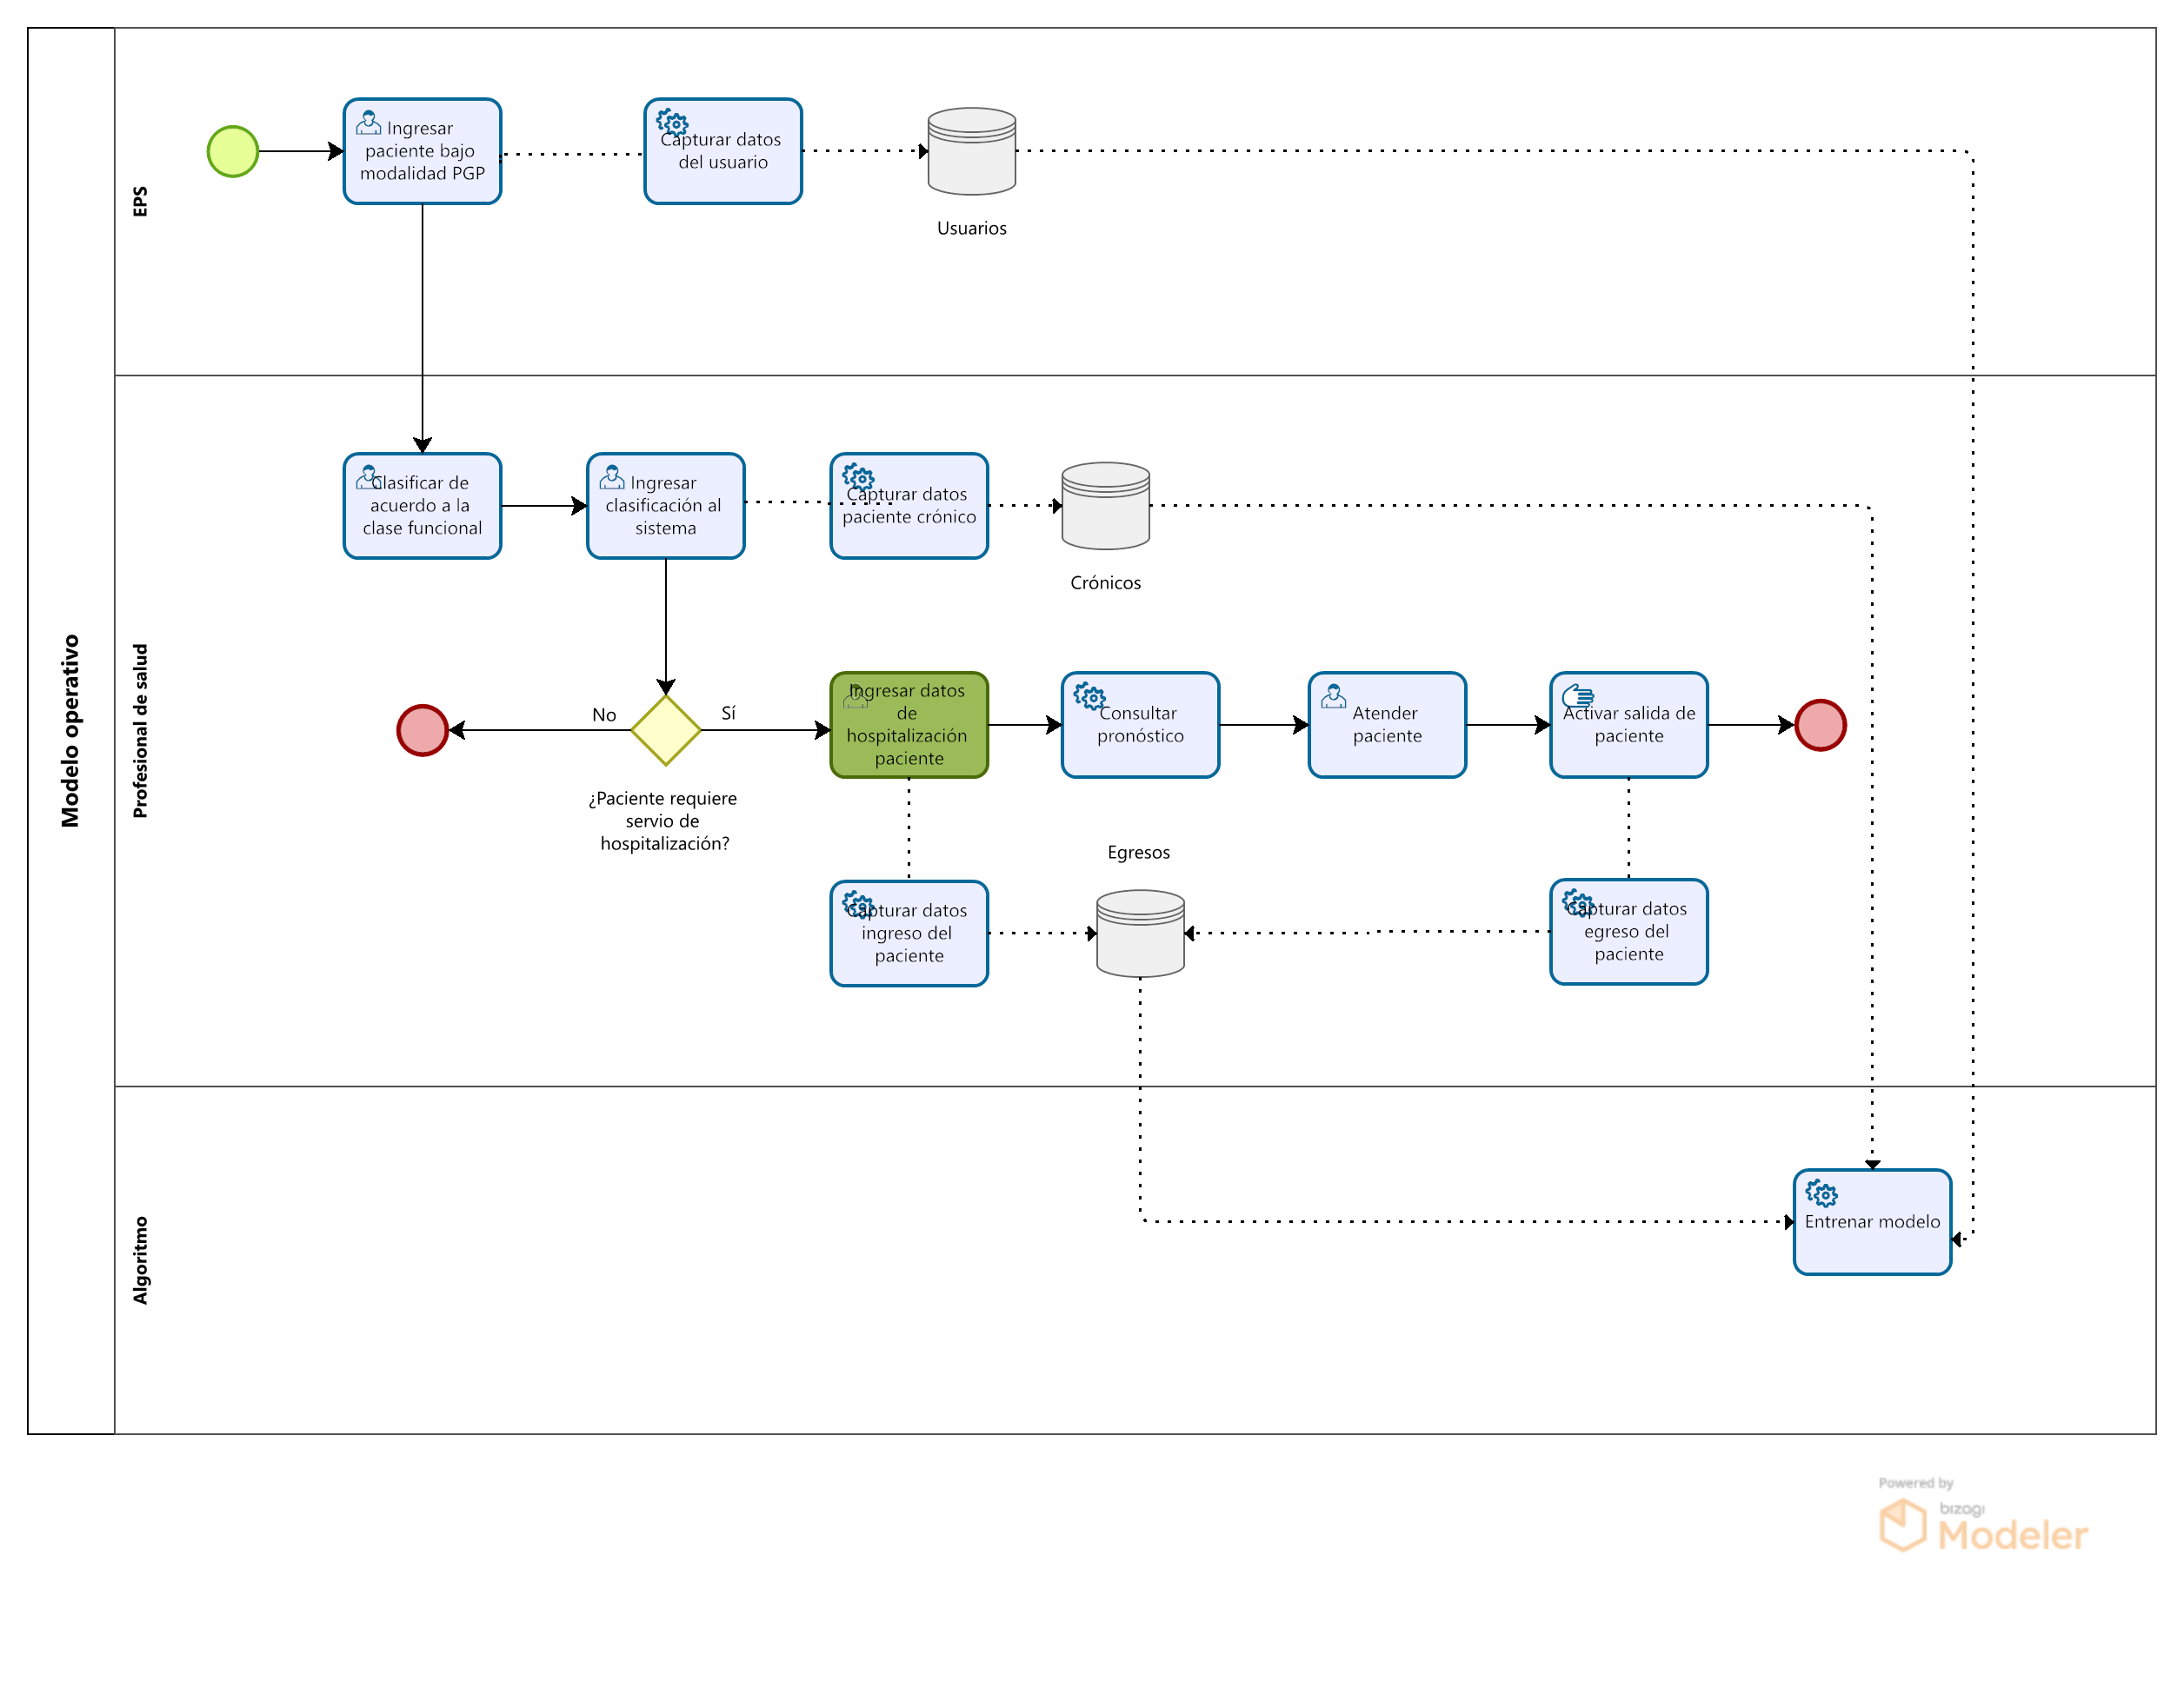


# **Limpieza y transformación**

## **Egresos Hospitalarios**

### **Ingesta de datos base egresos**

**Se carga la ase de datos correspondiente a los egresos de los pacientes. Esta base de datos contiene 6376 filas y 66 columnas donde se encuentra la informaciòn que identifica la entrada , ubicaciòn dentro de la clinica, el nùmero de la cama asignada, la causa del ingreso, el diagnònstico de ingreso, entre otros.**

In [ ]:
## Base de egresos hospitalarios (RETO_df_egresos.csv):
egresos = pd.read_csv('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/RETO_df_egresos.csv')
egresos.head(1)

,YEAR,MES,NRO ATENCION,NRO INGRESO,SERVICIO HABILITADO COD,SERVICIO HABILITADO,TIPO IDENTIFICACION,NRODOC,FECHA NACIMIENTO,REGIMEN AFILIACION,...,DX PRINCIPAL EGRESO CAPITULO COD,DX PRINCIPAL EGRESO CAPITULO,CAUSA BASICA MUERTE COD,CAUSA BASICA MUERTE,CAUSA BASICA CATEGORIA COD,CAUSA BASICA CATEGORIA,CAUSA BASICA CAPITULO COD,CAUSA BASICA CAPITULO,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,-1.0,Sin Informacion,CC,308185,1937-07-18 00:00:00.000,Sin información,...,J00-J99,ENFERMEDADES DEL SISTEMA RESPIRATORIO,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,NaN,Sin informacion en base de datos,Sin informacion en Base de datos,Medicina Interna


### **Forma**

**En este apartado se identifica la forma del dataset, donde se describe el nombre de las columnas, el tamaño de la base y el tipo de las variables**

In [ ]:
#Forma del DF
egresos.shape                    #Tamaño
egresos.columns                  #Nombre columnas
egresos.dtypes                   #Tipo de variable
print("El tamaño del DF es",egresos.shape )
print("El nombre de las columnas del DF es",egresos.columns )
print("El tipo de variable de cada columna es")
print(egresos.dtypes )

El tamaño del DF es (6376, 66)
El nombre de las columnas del DF es Index(['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD',
       'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC',
       'FECHA NACIMIENTO', 'REGIMEN AFILIACION', 'EPS VALIDADA',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2',
       'SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR',
       'SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO',
       'TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO',
       'FECHA POSIBLE ALTA', 'FECHA ALTA MEDICA', 'FECHA RECAUDO',
       'FECHA CAMILLERO', 'FECHA ENFERMERIA', 'FECHA FACTURACION AUDIFARMA',
       'FECHA FARMACIA', 'FECHA SALIDA', 'FECHA ASEO',
       'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO',
       'ALTA MEDICA', 'POSIBLE

### **Nulos**

**Se realixa un anàlisis de nulos con el objetivo de descartar a priori algunas variables que por su falta de datos, puedan complicar la realixaciòn del modelo.**



In [ ]:
nulos_egresos = egresos.isnull().sum()   
porcentaje_nulos = (nulos_egresos/egresos.shape[0])*100
porcentaje_nulos.sort_values(ascending = False).head(50)          

FECHA POSIBLE ALTA                   97.600376
CAUSA BASICA CAPITULO COD            91.154329
CAUSA BASICA CATEGORIA COD           91.154329
CAUSA BASICA MUERTE COD              91.122961
PERTINENCIA DIAGNOSTICA              81.430364
FECHA ENFERMERIA                     77.211418
FECHA RECAUDO                        74.921581
FECHA CAMILLERO                      71.204517
FECHA ASEO                           68.930364
FECHA FARMACIA                       67.675659
FECHA FACTURACION AUDIFARMA          67.377666
EPS VALIDADA                         35.649310
FECHA INGRESO SERVICIO               35.633626
FECHA INGRESO CLINICA                35.617942
DX RELACIONADO3 COD                   2.838770
DX PRINCIPAL EGRESO CAPITULO COD      1.129235
DX PRINCIPAL EGRESO CATEGORIA COD     1.129235
DX RELACIONADO2 COD                   1.050816
DX RELACIONADO1 COD                   0.297992
DEMORA SALIDA CLINICA (DIAS)          0.000000
PROFESIONAL ESPECIALIDAD              0.000000
TRANSFUSION S

- **Con el analisis del nùmero de nulos, se estable como criterio de eliminaciòn de variables, aquellas que en sus datos contengan màs del 40% como nulos. estas variables a eliminar son las siguientes:**
- 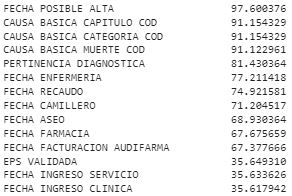



In [ ]:
egresos = egresos[['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO', 'SERVICIO HABILITADO COD', 'SERVICIO HABILITADO', 'TIPO IDENTIFICACION', 'NRODOC','FECHA NACIMIENTO', 'REGIMEN AFILIACION',
       'MODALIDAD CONTRATO', 'FUENTE FINANCIACION1', 'FUENTE FINANCIACION2','SERVICIO ADMITE', 'BLOQUE ANTERIOR', 'PISO ANTERIOR','SERVICIO ANTERIOR', 'NRO CAMA ANTERIOR', 'VIA INGRESO', 'BLOQUE',
       'UNIDAD ESTRATEGICA', 'PISO', 'NRO CAMA', 'SERVICIO EGRESO','TIPO EGRESO', 'FECHA INGRESO CLINICA', 'FECHA INGRESO SERVICIO', 'FECHA ALTA MEDICA', 'FECHA SALIDA', 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','ALTA MEDICA', 'POSIBLE ALTA', 'DXPRINCIPAL EGRESO COD','DXPRINCIPAL EGRESO', 'DX RELACIONADO1 COD', 'DX RELACIONADO1',
       'DX RELACIONADO2 COD', 'DX RELACIONADO2', 'DX RELACIONADO3 COD','DX RELACIONADO3', 'TIPO DIAGNOSTICO PRINCIPAL', 'DX PRINCIPAL EGRESO CATEGORIA COD','DX PRINCIPAL EGRESO CATEGORIA', 
       'DX PRINCIPAL EGRESO CAPITULO COD', 'DX PRINCIPAL EGRESO CAPITULO', 'CAUSA BASICA MUERTE', 'CAUSA BASICA CATEGORIA COD','CAUSA BASICA CATEGORIA', 'PROFESIONAL ESPECIALIDAD','PROFESIONAL ESPECIALIDAD GRD']]

- **Observando la base de datos, se realixò la identificaciòn de posibles variables que se relacionan con nuestro porblema de estancia promedio en la clinica, y que se relacionan con las otras bases y nos permitan dar solución al problema anàlitico.**
- **Se descartarò inicialmente variables como el nùmero de la cama asignada, causa de la muerte, la posible alta de la clinica, servicios varios, regimen,financiamientos, entre otras.**

In [ ]:
egresos_fil = egresos[['YEAR', 'MES', 'NRO ATENCION', 'NRO INGRESO','NRODOC','FECHA INGRESO SERVICIO', 'FECHA ALTA MEDICA', 'FECHA INGRESO CLINICA', 'DEMORA ASIGNACION CAMA', 'DEMORA APLICACION MEDICAMENTO',
       'DEMORA SALIDA CLINICA (DIAS)', 'TRANSFUSION SANGRE', 'ANTIBIOTICO','FECHA SALIDA','DXPRINCIPAL EGRESO','TIPO DIAGNOSTICO PRINCIPAL','PROFESIONAL ESPECIALIDAD',
       'PROFESIONAL ESPECIALIDAD GRD']]
egresos_fil.head(1)

,YEAR,MES,NRO ATENCION,NRO INGRESO,NRODOC,FECHA INGRESO SERVICIO,FECHA ALTA MEDICA,FECHA INGRESO CLINICA,DEMORA ASIGNACION CAMA,DEMORA APLICACION MEDICAMENTO,DEMORA SALIDA CLINICA (DIAS),TRANSFUSION SANGRE,ANTIBIOTICO,FECHA SALIDA,DXPRINCIPAL EGRESO,TIPO DIAGNOSTICO PRINCIPAL,PROFESIONAL ESPECIALIDAD,PROFESIONAL ESPECIALIDAD GRD
0,2017,MAYO,3433964,1899917,308185,NaN,2017-05-17 09:03:57.637,NaN,00:00,00:00,0.0,NO,NO,2017-05-17 10:55:02.000,ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EX...,Sin Informacion,Sin informacion en Base de datos,Medicina Interna


### **Fechas**

In [ ]:
egresos_fil['FECHA SALIDA'] = pd.to_datetime(egresos_fil['FECHA SALIDA'])
egresos_fil['FECHA INGRESO SERVICIO'] = pd.to_datetime(egresos_fil['FECHA INGRESO SERVICIO'])

In [ ]:
egresos_fil['Días de estancia']=egresos_fil['FECHA SALIDA']-egresos_fil['FECHA INGRESO SERVICIO']

In [ ]:
egresos_fil = egresos_fil[egresos_fil['Días de estancia'].notna()]
egresos_fil

In [ ]:
docs = pd.DataFrame()
docs['Repetidos'] = egresos_fil['NRODOC'].value_counts()
docs['NRODOC'] = egresos_fil['NRODOC'].value_counts().index
docs = docs.reset_index().drop('index', axis = 1)
docs

### **Selecciòn de datos**

**Debido a que en la base de datos de egresos se identifican en repetidas ocaciones visitas del mismo usuario (NRODOC), para lograr unificar los datos con las otras bases de datos, se decidìo considerar el ulitimo registro actualixado por cada paciente. Esto, con el fin de realixar el anàlisis de la informaciòn siempre en base a los datos màs recientes.**

In [ ]:
def usuarios_unicos(base):
  unicos = base.copy(deep = True)
  lista_docs =list(unicos['NRODOC'])
  len(lista_docs)
  df = pd.DataFrame()
  for i in lista_docs:
      filtro = unicos[unicos['NRODOC']== i].reset_index()
      if filtro.shape[0] > 1 :
        for j in range(0, filtro.shape[0] - 1):
          filtro.drop(j,axis = 0, inplace= True)
        df = df.append(filtro, ignore_index = True)
      else:
        df = df.append(filtro, ignore_index = True)
  return df

In [ ]:
df = usuarios_unicos(egresos_fil)

base = pd.merge(df ,docs, on = 'NRODOC', how= 'left')
base_egresos = base.drop('index', axis = 1)
base_egresos = base_egresos.drop_duplicates()

In [ ]:
base_egresos1 = base_egresos.copy(deep = True)

In [ ]:
base_egresos1.to_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/base_egresos1.csv",index=False)

In [ ]:
base_egresos1.shape

(2426, 20)

## **Cronicos**

### **Ingesta de datos**

**Se carga la base de datos correspondiente a los pacientes cronicos. Esta base de datos contiene 38736 filas y 289 columnas donde se encuentra la informaciòn que identifica las enfermedades del paciente, examenes medicos realixados al paciente, caracteristicas fisicas, test para determinal la clase funcional del paicente, rutinas de control, fechas de seguimiento de las proximas citas, entre otros.**

In [ ]:
## Base de datos de crónico (RETO_df_cronicos.csv):
cronicos = pd.read_csv('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/RETO_df_cronicos.csv')
cronicos.head(5)

### **Forma**

In [ ]:
#Forma del DF
cronicos.shape                    #Tamaño
cronicos.columns                  #Nombre columnas
cronicos.dtypes                   #Tipo de variable
print("El tamaño del DF es",cronicos.shape )
print("El nombre de las columnas del DF es",cronicos.columns )
print("El tipo de variable de cada columna es")
print(cronicos.dtypes )

### **Nulos**

In [ ]:
nulos_cronicos = cronicos.isnull().sum()   
porcentaje_nulos = (nulos_cronicos/cronicos.shape[0])*100
porcentaje_nulos.sort_values(ascending = True).head(50) 

**Se eliminan aquellas columnas cuya cantidad de datos nulos sean superior al 40%**

In [ ]:
lista = porcentaje_nulos[porcentaje_nulos <= 40]
a = pd.DataFrame(lista, columns = ['valores'])

In [ ]:
a.reset_index(inplace=True)
a['index'].tolist()

In [ ]:
cronicos_fill=cronicos[['YEAR','MES','Fecha diligenciamiento','Hora','Tipo','NRODOC','Peso','Talla','IMC','Clasificación IMC','Saturación de Oxígeno (%)','Perímetro Muslo',
 'Perímetro Cintura','Pliegue Triceps','Pliegue Abdomen','Pliegue Muslo','Sumatoria Pliegues','Presión Arterial Sistólica','Presión Arterial Diastólica','Frecuencia Cardíaca en reposo','Auto-calificacion Nivel de Ejercicio','Constantes',
 'METS -Índice Metabólico','VO2 - Máxima Cantidad de Oxígeno','Índice de Fragilidad Groningen','Calificación (Índice de Fragilidad)','Calificación (Apoyo Monopodal)',
 'Velocidad (m/s)','Calificación Velocidad','Test Findrisc','Diabetes Mellitus','Glicemia','Hemoglobina Glicada',
 'Control Diabetes','Tiene HTA','Control HTA','Tiene riesgo de tener HTA','Tiene EPOC','Enfermedad Coronaria (En el último año)','Insuficiencia Cardíaca','Valvulopatía','Arritmia o paciente con dispositivo',
 'Sufre de alguna enfermedad cardiovascular','Tabaquismo','Cuantos cigarrillos día','Lipoproteina','Fecha LDL','HDL','Colesterol total','Trigliceridos',
 'Clasificación de Framinghan','Creatinina 1 consulta','Tasa de Filtración Glomerular TFG','Estadio de la Enfermedad Renal','Microalbuminuria',
 'Hormona Estimulante de la Tiroides (TSH)','Clase Funcional','Creatinina 2 consulta','Tasa de Filtración Glomerular TFG2','Cambio de TFG',
 'Úlcera de pie diabético','Remisión','Diagnóstico Principal','Tiene próximo control','Tipo control','Requiere cita de morbilidad','Ambito según el médico']]

In [ ]:
cronicos_fill.shape

(38736, 69)

### **Selecciòn de Datos**

**Debido a que en la base de datos de cronicos se identifican en repetidas ocaciones visitas del mismo usuario (NRODOC), para lograr unificar los datos con las otras bases de datos, se decidìo considerar el ulitimo registro actualixado por cada paciente. Esto, con el fin de realixar el anàlisis de la informaciòn siempre en base a los datos màs recientes.**

In [ ]:
df = usuarios_unicos(cronicos_fill)

base = pd.merge(df,docs, on = 'NRODOC', how= 'left')
base_cronicos = base.drop('index', axis = 1)
base_cronicos = base_cronicos.drop_duplicates()

In [ ]:
base_cronicos1 = base_cronicos.copy(deep = True)

In [ ]:
base_cronicos1.to_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/base_cronicos1.csv",index=False)

In [ ]:
base_cronicos1.shape

(6099, 70)

## **Usuarios**

### **Ingesta de Datos**

In [ ]:
## Base de datos con el listado de la población perteneciente a la cohorte mensualmente 
## (RETO_df_usuarios.csv
usuarios = pd.read_csv('/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/RETO_df_usuarios.csv')
usuarios.head(5)

### **Forma**

In [ ]:
#Forma del DF
usuarios.shape                    #Tamaño
usuarios.columns                  #Nombre columnas
usuarios.dtypes                   #Tipo de variable
print("El tamaño del DF es",usuarios.shape )
print("El nombre de las columnas del DF es",usuarios.columns )
print("El tipo de variable de cada columna es")
print(usuarios.dtypes )

El tamaño del DF es (183911, 16)
El nombre de las columnas del DF es Index(['MES', 'YEAR', 'NRODOC', 'SEXO', 'FECHA NACIMIENTO', 'EDAD',
       'DEPARTAMENTO', 'MUNICIPIO', 'BARRIO', 'FECHA INICIO AL PGP',
       'FECHA PRIMERA CLASE FUNCIONAL', 'PRIMERA CLASE FUNCIONAL',
       'FECHA ÚLTIMA CLASE FUNCIONAL', 'ÚLTIMA CLASE FUNCIONAL', 'CICLO_VITAL',
       'QUINQUENIO'],
      dtype='object')
El tipo de variable de cada columna es
MES                               object
YEAR                               int64
NRODOC                             int64
SEXO                              object
FECHA NACIMIENTO                  object
EDAD                             float64
DEPARTAMENTO                      object
MUNICIPIO                         object
BARRIO                            object
FECHA INICIO AL PGP               object
FECHA PRIMERA CLASE FUNCIONAL     object
PRIMERA CLASE FUNCIONAL           object
FECHA ÚLTIMA CLASE FUNCIONAL      object
ÚLTIMA CLASE FUNCIONAL         

### **Selecciòn de Datos**

**Se seleccionaron las siguientes variables, eliminando aquellas que no poseen informacòn relevante para el estudio.**

In [ ]:
usuarios = usuarios[['MES', 'YEAR', 'NRODOC', 'SEXO', 'EDAD','FECHA NACIMIENTO',
       'DEPARTAMENTO', 'MUNICIPIO', 'BARRIO', 'CICLO_VITAL',
       'QUINQUENIO','PRIMERA CLASE FUNCIONAL','ÚLTIMA CLASE FUNCIONAL']]

In [ ]:
df = usuarios_unicos(usuarios)

base = pd.merge(df ,docs, on = 'NRODOC', how= 'left')
base_usuarios = base.drop('index', axis = 1)
base_usuarios = base_usuarios.drop_duplicates()

In [ ]:
base_usuarios1 = base_usuarios.copy(deep = True)

In [ ]:
base_usuarios1.to_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/base_usuarios1.csv",index=False)

In [ ]:
base_usuarios1.shape

(8068, 14)

## **Union**

In [ ]:
df1 = base_egresos1.merge(base_cronicos1, on=('NRODOC'), how='left')
estancia_promedio = df1.merge(base_usuarios1, on=('NRODOC'), how='left')
estancia_promedio.shape

In [ ]:
estancia_promedio.columns = estancia_promedio.columns.str.lower()

NameError: ignored

In [ ]:
estancia_promedio.to_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/estancia_promedio.csv",index=False)

##**Analisis base unida**

**Se guardo la base unida en un archivo csv con el fin de evitar repetir la carga e ingesta de los datos**

In [ ]:
estancia_promedio1 = pd.read_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/estancia_promedio.csv")

In [ ]:
nulos = (estancia_promedio1.isnull().sum()/estancia_promedio1.shape[0])*100

In [ ]:
nulos.sort_values(ascending = False)

test findrisc                   50.865622
fecha ldl                       39.076669
control hta                     31.821929
tiene riesgo de tener hta       31.821929
municipio                       31.533388
                                  ...    
tipo diagnostico principal       0.000000
profesional especialidad         0.000000
profesional especialidad grd     0.000000
días de estancia                 0.000000
repetidos                        0.000000
Length: 102, dtype: float64

In [ ]:
estancia_promedio_premodelo = estancia_promedio1.drop(['test findrisc','year_x','mes_x','nro atencion','nro ingreso','fecha ingreso servicio','fecha alta medica','fecha ingreso clinica',
'fecha salida','repetidos_x','repetidos_y','repetidos', 'year_y','mes_y','fecha diligenciamiento','hora','atención','ingreso','fecha ldl', 'demora asignacion cama', 'demora aplicacion medicamento', 'demora salida clinica (dias)'], axis=1)

In [ ]:
estancia_promedio_premodelo.columns

Index(['nrodoc', 'transfusion sangre', 'antibiotico', 'dxprincipal egreso',
       'tipo diagnostico principal', 'profesional especialidad',
       'profesional especialidad grd', 'días de estancia', 'tipo', 'peso',
       'talla', 'imc', 'clasificación imc', 'saturación de oxígeno (%)',
       'perímetro muslo', 'perímetro cintura', 'pliegue triceps',
       'pliegue abdomen', 'pliegue muslo', 'sumatoria pliegues',
       'presión arterial sistólica', 'presión arterial diastólica',
       'frecuencia cardíaca en reposo', 'auto-calificacion nivel de ejercicio',
       'constantes', 'mets -índice metabólico',
       'vo2 - máxima cantidad de oxígeno', 'índice de fragilidad groningen',
       'calificación (índice de fragilidad)', 'calificación (apoyo monopodal)',
       'velocidad (m/s)', 'calificación velocidad', 'diabetes mellitus',
       'glicemia', 'hemoglobina glicada', 'control diabetes', 'tiene hta',
       'control hta', 'tiene riesgo de tener hta', 'tiene epoc',
       'enferm

In [ ]:
estancia_promedio_premodelo.shape

(2426, 80)

In [ ]:
nulos = (estancia_promedio_premodelo.isnull().sum()/estancia_promedio_premodelo.shape[0])*100

In [ ]:
nulos.sort_values(ascending = False)

tiene riesgo de tener hta      31.821929
control hta                    31.821929
municipio                      31.533388
departamento                   31.203627
clasificación de framinghan    28.936521
                                 ...    
profesional especialidad        0.000000
tipo diagnostico principal      0.000000
dxprincipal egreso              0.000000
antibiotico                     0.000000
nrodoc                          0.000000
Length: 80, dtype: float64

In [ ]:
# No se evidencian problemas de digitación de las catgorias de las variables
lista = [['nrodoc','transfusion sangre','antibiotico','dxprincipal egreso','tipo diagnostico principal','profesional especialidad',
 'profesional especialidad grd','días de estancia','tipo', 'peso','talla','imc','clasificación imc','saturación de oxígeno (%)','perímetro muslo','perímetro cintura','pliegue triceps','pliegue abdomen','pliegue muslo',
 'sumatoria pliegues','presión arterial sistólica','presión arterial diastólica','frecuencia cardíaca en reposo','auto-calificacion nivel de ejercicio', 'constantes','mets -índice metabólico',
 'vo2 - máxima cantidad de oxígeno', 'índice de fragilidad groningen', 'calificación (índice de fragilidad)', 'calificación (apoyo monopodal)','velocidad (m/s)', 'calificación velocidad', 'diabetes mellitus',
 'glicemia', 'hemoglobina glicada', 'control diabetes', 'tiene hta', 'control hta', 'tiene riesgo de tener hta', 'tiene epoc', 'enfermedad coronaria (en el último año)', 'insuficiencia cardíaca', 'valvulopatía',
 'arritmia o paciente con dispositivo', 'sufre de alguna enfermedad cardiovascular', 'tabaquismo', 'cuantos cigarrillos día', 'lipoproteina', 'hdl', 'colesterol total', 'trigliceridos',
 'clasificación de framinghan', 'creatinina 1 consulta', 'tasa de filtración glomerular tfg', 'estadio de la enfermedad renal', 'microalbuminuria', 'hormona estimulante de la tiroides (tsh)', 'clase funcional', 'creatinina 2 consulta',
 'tasa de filtración glomerular tfg2','cambio de tfg', 'úlcera de pie diabético', 'remisión', 'diagnóstico principal', 'tiene próximo control', 'tipo control', 'requiere cita de morbilidad', 'ambito según el médico', 'mes',
 'year', 'sexo', 'edad', 'fecha nacimiento', 'departamento', 'municipio', 'barrio', 'ciclo_vital', 'quinquenio', 'primera clase funcional', 'última clase funcional']] #Se crea una lista para poder aplicar funciones
for i in lista:
  print(estancia_promedio_premodelo[i].value_counts())  #Contar los valores de cada categoria
  print('--------------------------------') 

nrodoc  transfusion sangre  antibiotico  dxprincipal egreso                                                       tipo diagnostico principal  profesional especialidad  profesional especialidad grd  días de estancia         tipo  peso   talla  imc    clasificación imc  saturación de oxígeno (%)  perímetro muslo  perímetro cintura  pliegue triceps  pliegue abdomen  pliegue muslo  sumatoria pliegues  presión arterial sistólica  presión arterial diastólica  frecuencia cardíaca en reposo  auto-calificacion nivel de ejercicio  constantes  mets -índice metabólico  vo2 - máxima cantidad de oxígeno  índice de fragilidad groningen  calificación (índice de fragilidad)  calificación (apoyo monopodal)  velocidad (m/s)  calificación velocidad  diabetes mellitus  glicemia  hemoglobina glicada  control diabetes  tiene hta  control hta    tiene riesgo de tener hta  tiene epoc  enfermedad coronaria (en el último año)  insuficiencia cardíaca  valvulopatía  arritmia o paciente con dispositivo  sufre de al

# **Análisis exploratrio**

**Para este análisis exploratorio de la información obtenidad, decidimos identificar por medio de los factores de riesgo definidos en la investigación, si estos hacen más propenso o no al paciente para ser catálogado como paciente cronico con poco nivel de movilidad.**


---

**En enste análisis exploratorio podemos encontrar que clasificaciones de fragilidad son más  severas, si el peso o la edad influeyen en el desarrollo de enfermedades cronicas severas, y por ultimo si habitos como el cigarrillo o el desarrollo de porblemas cardiovasculares empeoran o no las enfermedades cronicas.**


In [ ]:
base = estancia_promedio_premodelo.groupby(['clasificación imc','clase funcional'])[['nrodoc']].count().sort_values('nrodoc', ascending = False).rename(columns = {'nrodoc':'Total'}).reset_index()
fig = px.sunburst(base, path = ['clasificación imc','clase funcional'], values = 'Total', title = '<b>¿Cuál es la clasificaciòn de imc más propensa a ser cronica <b>')
fig.show()

In [ ]:
g1 = estancia_promedio_premodelo.groupby(['quinquenio','clase funcional'])[['nrodoc']].count().reset_index()
fig = px.bar(g1, x='clase funcional', y="nrodoc", color='quinquenio', title="Quinquenio y clasificacín grupo funcional", barmode = 'group')
fig.show()

In [ ]:
g1 = estancia_promedio_premodelo.groupby(['sufre de alguna enfermedad cardiovascular','clase funcional'])[['nrodoc']].count().reset_index()
fig = px.bar(g1, x='clase funcional', y="nrodoc", color='sufre de alguna enfermedad cardiovascular', title="Enfermedad cardiovascular y clase funcional", barmode = 'group')
fig.show()

In [ ]:
base = estancia_promedio_premodelo.groupby(['calificación (apoyo monopodal)','clase funcional'])[['nrodoc']].count().sort_values('nrodoc', ascending = False).rename(columns = {'nrodoc':'Total'}).reset_index()
fig = px.sunburst(base, path = ['calificación (apoyo monopodal)','clase funcional'], values = 'Total', title = '<b>¿Cuál es la calificación del apoyo monopodal más propensa a ser cronica <b>')
fig.show()

In [ ]:
base = estancia_promedio_premodelo.groupby(['calificación (índice de fragilidad)','clase funcional'])[['nrodoc']].count().sort_values('nrodoc', ascending = False).rename(columns = {'nrodoc':'Total'}).reset_index()
fig = px.sunburst(base, path = ['calificación (índice de fragilidad)','clase funcional'], values = 'Total', title = '<b>¿Cuál es la calificación del índice de fragilidad groningen más propensa a ser cronica <b>')
fig.show()

In [ ]:
base = estancia_promedio_premodelo.groupby(['calificación velocidad','clase funcional'])[['nrodoc']].count().sort_values('nrodoc', ascending = False).rename(columns = {'nrodoc':'Total'}).reset_index()
fig = px.sunburst(base, path = ['calificación velocidad','clase funcional'], values = 'Total', title = '<b>¿Cuál es la calificación velocidad más propensa a ser cronica <b>')
fig.show()

In [ ]:
g1 = estancia_promedio_premodelo.groupby(['tabaquismo','clase funcional'])[['nrodoc']].count().reset_index()
fig = px.bar(g1, x='clase funcional', y="nrodoc", color='tabaquismo', title="tabaquismo y clasificacín grupo funcional", barmode = 'group')
fig.show()

# **Selección de Variables**

### **Variables Categoricas**

In [ ]:
estancia_promedio_premodelo_cat = estancia_promedio_premodelo[['nrodoc','transfusion sangre','antibiotico','dxprincipal egreso','tipo diagnostico principal','profesional especialidad',
 'profesional especialidad grd','tipo','clasificación imc', 'calificación (índice de fragilidad)', 'calificación (apoyo monopodal)', 'calificación velocidad', 'diabetes mellitus',
 'control diabetes', 'tiene hta', 'control hta', 'tiene riesgo de tener hta', 'tiene epoc', 'enfermedad coronaria (en el último año)', 'insuficiencia cardíaca', 'valvulopatía',
 'arritmia o paciente con dispositivo', 'sufre de alguna enfermedad cardiovascular', 'tabaquismo', 
 'clasificación de framinghan', 'estadio de la enfermedad renal', 'clase funcional', 'úlcera de pie diabético', 'remisión', 'diagnóstico principal', 'tiene próximo control', 'tipo control', 'requiere cita de morbilidad', 'ambito según el médico', 'mes',
 'sexo',  'departamento', 'municipio', 'barrio', 'ciclo_vital', 'quinquenio', 'primera clase funcional', 'última clase funcional']]

In [ ]:
estancia_promedio_premodelo_cat.columns = estancia_promedio_premodelo_cat.columns.str.replace(' ','_')
estancia_promedio_premodelo_cat.columns = estancia_promedio_premodelo_cat.columns.str.replace('(','')
estancia_promedio_premodelo_cat.columns = estancia_promedio_premodelo_cat.columns.str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# No se evidencian problemas de digitación de las catgorias de las variables
lista = [['transfusion_sangre','antibiotico', 'dxprincipal_egreso','tipo_diagnostico_principal', 'profesional_especialidad', 'profesional_especialidad_grd', 'tipo', 'clasificación_imc', 'calificación_índice_de_fragilidad', 'calificación_apoyo_monopodal', 'calificación_velocidad',
 'diabetes_mellitus', 'control_diabetes', 'tiene_hta', 'control_hta', 'tiene_riesgo_de_tener_hta', 'tiene_epoc', 'enfermedad_coronaria_en_el_último_año', 'insuficiencia_cardíaca', 'valvulopatía', 'arritmia_o_paciente_con_dispositivo', 'sufre_de_alguna_enfermedad_cardiovascular',
 'tabaquismo', 'clasificación_de_framinghan', 'estadio_de_la_enfermedad_renal', 'clase_funcional', 'úlcera_de_pie_diabético', 'remisión', 'diagnóstico_principal', 'tiene_próximo_control', 'tipo_control',
 'requiere_cita_de_morbilidad', 'ambito_según_el_médico', 'mes', 'sexo', 'departamento', 'municipio', 'barrio', 'ciclo_vital', 'quinquenio', 'primera_clase_funcional', 'última_clase_funcional'
 ]] #Se crea una lista para poder aplicar funciones
for i in lista:
  print(estancia_promedio_premodelo_cat[i].value_counts())  #Contar los valores de cada categoria
  print('--------------------------------') 

transfusion_sangre  antibiotico  dxprincipal_egreso                                                                   tipo_diagnostico_principal  profesional_especialidad  profesional_especialidad_grd  tipo  clasificación_imc  calificación_índice_de_fragilidad  calificación_apoyo_monopodal  calificación_velocidad  diabetes_mellitus  control_diabetes  tiene_hta  control_hta  tiene_riesgo_de_tener_hta  tiene_epoc  enfermedad_coronaria_en_el_último_año  insuficiencia_cardíaca  valvulopatía  arritmia_o_paciente_con_dispositivo  sufre_de_alguna_enfermedad_cardiovascular  tabaquismo  clasificación_de_framinghan  estadio_de_la_enfermedad_renal  clase_funcional     úlcera_de_pie_diabético  remisión  diagnóstico_principal                                                                        tiene_próximo_control  tipo_control  requiere_cita_de_morbilidad  ambito_según_el_médico  mes    sexo  departamento  municipio  barrio              ciclo_vital  quinquenio  primera_clase_funcional  última_c

In [ ]:
from  statistics import mode

In [ ]:

estancia_promedio_premodelo_cat_columns  = estancia_promedio_premodelo_cat.select_dtypes(include=['object']).columns.tolist()
integer_columns=estancia_promedio_premodelo_cat.select_dtypes(include=['int64','float64']).columns.tolist()

for column in estancia_promedio_premodelo_cat:
    if estancia_promedio_premodelo_cat[column].isnull().any():
        if(column in estancia_promedio_premodelo_cat_columns):
            estancia_promedio_premodelo_cat[column]=estancia_promedio_premodelo_cat[column].fillna(estancia_promedio_premodelo_cat[column].mode()[0])
        else:
            estancia_promedio_premodelo_cat[column]=estancia_promedio_premodelo_cat[column].fillna(estancia_promedio_premodelo_cat[column].mean)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### **Variables Numéricas**

In [ ]:
estancia_promedio_premodelo_num = estancia_promedio_premodelo[['nrodoc'
 ,'días de estancia', 'peso','talla','imc','saturación de oxígeno (%)','perímetro muslo','perímetro cintura','pliegue triceps','pliegue abdomen','pliegue muslo',
 'sumatoria pliegues','presión arterial sistólica','presión arterial diastólica','frecuencia cardíaca en reposo','auto-calificacion nivel de ejercicio', 'constantes','mets -índice metabólico',
 'vo2 - máxima cantidad de oxígeno', 'índice de fragilidad groningen','velocidad (m/s)','glicemia', 'hemoglobina glicada', 
 'lipoproteina', 'hdl', 'colesterol total', 'trigliceridos', 'creatinina 1 consulta', 'tasa de filtración glomerular tfg', 'microalbuminuria', 'hormona estimulante de la tiroides (tsh)', 'creatinina 2 consulta',
'tasa de filtración glomerular tfg2','cambio de tfg', 'year',  'edad']]

In [ ]:
estancia_promedio_premodelo_num.columns = estancia_promedio_premodelo_num.columns.str.replace(' ','_')
estancia_promedio_premodelo_num.columns = estancia_promedio_premodelo_num.columns.str.replace('(','')
estancia_promedio_premodelo_num.columns = estancia_promedio_premodelo_num.columns.str.replace(')','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


**Se cambia el formato de la variable días_de_estancia para poder escalarla posteriormente**

In [ ]:
estancia_promedio_premodelo_num['días_de_estancia'] = estancia_promedio_premodelo_num['días_de_estancia'] / pd.Timedelta(days=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### **Escalado de Variables**

In [ ]:
##Variables categoricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

estancia_promedio_premodelo_cat['transfusion_sangre'] = le.fit_transform(estancia_promedio_premodelo_cat.transfusion_sangre)
estancia_promedio_premodelo_cat['antibiotico'] = le.fit_transform(estancia_promedio_premodelo_cat.antibiotico)
estancia_promedio_premodelo_cat['dxprincipal_egreso'] = le.fit_transform(estancia_promedio_premodelo_cat.dxprincipal_egreso)
estancia_promedio_premodelo_cat['tipo_diagnostico_principal'] = le.fit_transform(estancia_promedio_premodelo_cat.tipo_diagnostico_principal)
estancia_promedio_premodelo_cat['profesional_especialidad'] = le.fit_transform(estancia_promedio_premodelo_cat.profesional_especialidad)
estancia_promedio_premodelo_cat['profesional_especialidad_grd'] = le.fit_transform(estancia_promedio_premodelo_cat.profesional_especialidad_grd)
estancia_promedio_premodelo_cat['tipo'] = le.fit_transform(estancia_promedio_premodelo_cat.tipo)
estancia_promedio_premodelo_cat['clasificación_imc'] = le.fit_transform(estancia_promedio_premodelo_cat.clasificación_imc)
estancia_promedio_premodelo_cat['calificación_índice_de_fragilidad'] = le.fit_transform(estancia_promedio_premodelo_cat.calificación_índice_de_fragilidad)
estancia_promedio_premodelo_cat['calificación_apoyo_monopodal'] = le.fit_transform(estancia_promedio_premodelo_cat.calificación_apoyo_monopodal)
estancia_promedio_premodelo_cat['calificación_velocidad'] = le.fit_transform(estancia_promedio_premodelo_cat.calificación_velocidad)
estancia_promedio_premodelo_cat['diabetes_mellitus'] = le.fit_transform(estancia_promedio_premodelo_cat.diabetes_mellitus)
estancia_promedio_premodelo_cat['control_diabetes'] = le.fit_transform(estancia_promedio_premodelo_cat.control_diabetes)
estancia_promedio_premodelo_cat['tiene_hta'] = le.fit_transform(estancia_promedio_premodelo_cat.tiene_hta)
estancia_promedio_premodelo_cat['control_hta'] = le.fit_transform(estancia_promedio_premodelo_cat.control_hta)
estancia_promedio_premodelo_cat['tiene_riesgo_de_tener_hta'] = le.fit_transform(estancia_promedio_premodelo_cat.tiene_riesgo_de_tener_hta)
estancia_promedio_premodelo_cat['tiene_epoc'] = le.fit_transform(estancia_promedio_premodelo_cat.tiene_epoc)
estancia_promedio_premodelo_cat['enfermedad_coronaria_en_el_último_año'] = le.fit_transform(estancia_promedio_premodelo_cat.enfermedad_coronaria_en_el_último_año)
estancia_promedio_premodelo_cat['insuficiencia_cardíaca'] = le.fit_transform(estancia_promedio_premodelo_cat.insuficiencia_cardíaca)
estancia_promedio_premodelo_cat['valvulopatía'] = le.fit_transform(estancia_promedio_premodelo_cat.valvulopatía)
estancia_promedio_premodelo_cat['arritmia_o_paciente_con_dispositivo'] = le.fit_transform(estancia_promedio_premodelo_cat.arritmia_o_paciente_con_dispositivo)
estancia_promedio_premodelo_cat['sufre_de_alguna_enfermedad_cardiovascular'] = le.fit_transform(estancia_promedio_premodelo_cat.sufre_de_alguna_enfermedad_cardiovascular)
estancia_promedio_premodelo_cat['tabaquismo'] = le.fit_transform(estancia_promedio_premodelo_cat.tabaquismo)
estancia_promedio_premodelo_cat['clasificación_de_framinghan'] = le.fit_transform(estancia_promedio_premodelo_cat.clasificación_de_framinghan)
estancia_promedio_premodelo_cat['estadio_de_la_enfermedad_renal'] = le.fit_transform(estancia_promedio_premodelo_cat.estadio_de_la_enfermedad_renal)
estancia_promedio_premodelo_cat['clase_funcional'] = le.fit_transform(estancia_promedio_premodelo_cat.clase_funcional)
estancia_promedio_premodelo_cat['úlcera_de_pie_diabético'] = le.fit_transform(estancia_promedio_premodelo_cat.úlcera_de_pie_diabético)
estancia_promedio_premodelo_cat['remisión'] = le.fit_transform(estancia_promedio_premodelo_cat.remisión)
estancia_promedio_premodelo_cat['diagnóstico_principal'] = le.fit_transform(estancia_promedio_premodelo_cat.diagnóstico_principal)
estancia_promedio_premodelo_cat['tiene_próximo_control'] = le.fit_transform(estancia_promedio_premodelo_cat.tiene_próximo_control)
estancia_promedio_premodelo_cat['tipo_control'] = le.fit_transform(estancia_promedio_premodelo_cat.tipo_control)
estancia_promedio_premodelo_cat['requiere_cita_de_morbilidad'] = le.fit_transform(estancia_promedio_premodelo_cat.requiere_cita_de_morbilidad)
estancia_promedio_premodelo_cat['ambito_según_el_médico'] = le.fit_transform(estancia_promedio_premodelo_cat.ambito_según_el_médico)
estancia_promedio_premodelo_cat['mes'] = le.fit_transform(estancia_promedio_premodelo_cat.mes)
estancia_promedio_premodelo_cat['sexo'] = le.fit_transform(estancia_promedio_premodelo_cat.sexo)
estancia_promedio_premodelo_cat['departamento'] = le.fit_transform(estancia_promedio_premodelo_cat.departamento)
estancia_promedio_premodelo_cat['municipio'] = le.fit_transform(estancia_promedio_premodelo_cat.municipio)
estancia_promedio_premodelo_cat['barrio'] = le.fit_transform(estancia_promedio_premodelo_cat.barrio)
estancia_promedio_premodelo_cat['ciclo_vital'] = le.fit_transform(estancia_promedio_premodelo_cat.ciclo_vital)
estancia_promedio_premodelo_cat['quinquenio'] = le.fit_transform(estancia_promedio_premodelo_cat.quinquenio)
estancia_promedio_premodelo_cat['primera_clase_funcional'] = le.fit_transform(estancia_promedio_premodelo_cat.primera_clase_funcional)
estancia_promedio_premodelo_cat['última_clase_funcional'] = le.fit_transform(estancia_promedio_premodelo_cat.última_clase_funcional)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
def clean_column(series):
    series = pd.to_numeric(series, downcast="float")
    avg = series.mean()
    return series.fillna(avg)

estancia_promedio_premodelo_num = estancia_promedio_premodelo_num.transform(clean_column)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

estancia_promedio_premodelo_num[['días_de_estancia']] = scaler.fit_transform(estancia_promedio_premodelo_num[['días_de_estancia']])
estancia_promedio_premodelo_num[['peso']] = scaler.fit_transform(estancia_promedio_premodelo_num[['peso']])
estancia_promedio_premodelo_num[['talla']] = scaler.fit_transform(estancia_promedio_premodelo_num[['talla']])
estancia_promedio_premodelo_num[['imc']] = scaler.fit_transform(estancia_promedio_premodelo_num[['imc']])
estancia_promedio_premodelo_num[['saturación_de_oxígeno_%']] = scaler.fit_transform(estancia_promedio_premodelo_num[['saturación_de_oxígeno_%']])
estancia_promedio_premodelo_num[['perímetro_muslo']] = scaler.fit_transform(estancia_promedio_premodelo_num[['perímetro_muslo']])
estancia_promedio_premodelo_num[['perímetro_cintura']] = scaler.fit_transform(estancia_promedio_premodelo_num[['perímetro_cintura']])
estancia_promedio_premodelo_num[['pliegue_triceps']] = scaler.fit_transform(estancia_promedio_premodelo_num[['pliegue_triceps']])
estancia_promedio_premodelo_num[['pliegue_abdomen']] = scaler.fit_transform(estancia_promedio_premodelo_num[['pliegue_abdomen']])
estancia_promedio_premodelo_num[['pliegue_muslo']] = scaler.fit_transform(estancia_promedio_premodelo_num[['pliegue_muslo']])
estancia_promedio_premodelo_num[['sumatoria_pliegues']] = scaler.fit_transform(estancia_promedio_premodelo_num[['sumatoria_pliegues']])
estancia_promedio_premodelo_num[['presión_arterial_sistólica']] = scaler.fit_transform(estancia_promedio_premodelo_num[['presión_arterial_sistólica']])
estancia_promedio_premodelo_num[['presión_arterial_diastólica']] = scaler.fit_transform(estancia_promedio_premodelo_num[['presión_arterial_diastólica']])
estancia_promedio_premodelo_num[['frecuencia_cardíaca_en_reposo']] = scaler.fit_transform(estancia_promedio_premodelo_num[['frecuencia_cardíaca_en_reposo']])
estancia_promedio_premodelo_num[['auto-calificacion_nivel_de_ejercicio']] = scaler.fit_transform(estancia_promedio_premodelo_num[['auto-calificacion_nivel_de_ejercicio']])
estancia_promedio_premodelo_num[['constantes']] = scaler.fit_transform(estancia_promedio_premodelo_num[['constantes']])
estancia_promedio_premodelo_num[['mets_-índice_metabólico']] = scaler.fit_transform(estancia_promedio_premodelo_num[['mets_-índice_metabólico']])
estancia_promedio_premodelo_num[['vo2_-_máxima_cantidad_de_oxígeno']] = scaler.fit_transform(estancia_promedio_premodelo_num[['vo2_-_máxima_cantidad_de_oxígeno']])
estancia_promedio_premodelo_num[['índice_de_fragilidad_groningen']] = scaler.fit_transform(estancia_promedio_premodelo_num[['índice_de_fragilidad_groningen']])
estancia_promedio_premodelo_num[['velocidad_m/s']] = scaler.fit_transform(estancia_promedio_premodelo_num[['velocidad_m/s']])
estancia_promedio_premodelo_num[['glicemia']] = scaler.fit_transform(estancia_promedio_premodelo_num[['glicemia']])
estancia_promedio_premodelo_num[['hemoglobina_glicada']] = scaler.fit_transform(estancia_promedio_premodelo_num[['hemoglobina_glicada']])
estancia_promedio_premodelo_num[['lipoproteina']] = scaler.fit_transform(estancia_promedio_premodelo_num[['lipoproteina']])
estancia_promedio_premodelo_num[['hdl']] = scaler.fit_transform(estancia_promedio_premodelo_num[['hdl']])
estancia_promedio_premodelo_num[['colesterol_total']] = scaler.fit_transform(estancia_promedio_premodelo_num[['colesterol_total']])
estancia_promedio_premodelo_num[['trigliceridos']] = scaler.fit_transform(estancia_promedio_premodelo_num[['trigliceridos']])
estancia_promedio_premodelo_num[['creatinina_1_consulta']] = scaler.fit_transform(estancia_promedio_premodelo_num[['creatinina_1_consulta']])
estancia_promedio_premodelo_num[['tasa_de_filtración_glomerular_tfg']] = scaler.fit_transform(estancia_promedio_premodelo_num[['tasa_de_filtración_glomerular_tfg']])
estancia_promedio_premodelo_num[['microalbuminuria']] = scaler.fit_transform(estancia_promedio_premodelo_num[['microalbuminuria']])
estancia_promedio_premodelo_num[['hormona_estimulante_de_la_tiroides_tsh']] = scaler.fit_transform(estancia_promedio_premodelo_num[['hormona_estimulante_de_la_tiroides_tsh']])
estancia_promedio_premodelo_num[['creatinina_2_consulta']] = scaler.fit_transform(estancia_promedio_premodelo_num[['creatinina_2_consulta']])
estancia_promedio_premodelo_num[['tasa_de_filtración_glomerular_tfg2']] = scaler.fit_transform(estancia_promedio_premodelo_num[['tasa_de_filtración_glomerular_tfg2']])
estancia_promedio_premodelo_num[['cambio_de_tfg']] = scaler.fit_transform(estancia_promedio_premodelo_num[['cambio_de_tfg']])
estancia_promedio_premodelo_num[['year']] = scaler.fit_transform(estancia_promedio_premodelo_num[['year']])
estancia_promedio_premodelo_num[['edad']] = scaler.fit_transform(estancia_promedio_premodelo_num[['edad']])


In [ ]:
estancia_promedio_final = estancia_promedio_premodelo_num.merge(estancia_promedio_premodelo_cat, on=('nrodoc'), how='left')
estancia_promedio_final

,nrodoc,días_de_estancia,peso,talla,imc,saturación_de_oxígeno_%,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,...,ambito_según_el_médico,mes,sexo,departamento,municipio,barrio,ciclo_vital,quinquenio,primera_clase_funcional,última_clase_funcional
0,308185.0,0.183916,0.327485,0.797872,0.000041,0.282609,0.009250,0.526316,0.288462,0.500000,...,0,2,0,0,6,250,2,12,2,6
1,310222.0,0.297108,0.393192,0.835959,0.000545,0.869855,0.008398,0.484785,0.304695,0.249219,...,0,0,0,0,6,255,2,13,2,4
2,307108.0,0.360024,0.321637,0.877660,0.000033,0.869565,0.005236,0.378947,0.173077,0.033333,...,1,6,1,0,6,236,2,14,4,4
3,308440.0,0.171535,0.380117,0.819149,0.000045,0.826087,0.006981,0.521053,0.153846,0.033333,...,1,6,0,0,6,236,2,9,4,4
4,308738.0,0.252854,0.321637,0.797872,0.000040,0.978261,0.006632,0.515790,0.192308,0.111111,...,1,6,0,0,6,11,2,12,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,312056.0,0.214948,0.409357,0.872340,0.000043,0.782609,0.006108,0.378947,0.057692,0.033333,...,1,6,0,0,6,255,2,11,2,4
2422,308757.0,0.245146,0.467836,0.781915,0.000061,0.630435,0.009948,0.600000,0.538462,0.277778,...,0,2,0,0,6,134,2,10,1,6
2423,308759.0,0.274911,0.584795,0.840425,0.000066,0.891304,0.008726,0.578947,0.000000,0.000000,...,1,2,0,0,6,84,2,13,9,9
2424,313987.0,0.195202,0.286550,0.824468,0.000033,0.913043,0.009250,0.426316,0.384615,0.333333,...,0,6,0,0,6,156,2,10,1,2


In [ ]:
estancia_promedio_final = estancia_promedio_final.drop(['nrodoc','year'], axis = 1)

In [ ]:
estancia_promedio_final.to_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/estancia_promedio_final.csv",index=False)

In [ ]:
estancia_promedio_final = pd.read_csv("/content/drive/Shareddrives/Analitica 2 trabajo /Analítica III/3. Aplicaciones en operaciones/estancia_promedio_final.csv")

In [ ]:
estancia_promedio_final

,días_de_estancia,peso,talla,imc,saturación_de_oxígeno_%,perímetro_muslo,perímetro_cintura,pliegue_triceps,pliegue_abdomen,pliegue_muslo,...,ambito_según_el_médico,mes,sexo,departamento,municipio,barrio,ciclo_vital,quinquenio,primera_clase_funcional,última_clase_funcional
0,0.183916,0.327485,0.797872,0.000041,0.282609,0.009250,0.526316,0.288462,0.500000,0.517241,...,0,2,0,0,6,250,2,12,2,6
1,0.297108,0.393192,0.835959,0.000545,0.869855,0.008398,0.484785,0.304695,0.249219,0.216667,...,0,0,0,0,6,255,2,13,2,4
2,0.360024,0.321637,0.877660,0.000033,0.869565,0.005236,0.378947,0.173077,0.033333,0.034483,...,1,6,1,0,6,236,2,14,4,4
3,0.171535,0.380117,0.819149,0.000045,0.826087,0.006981,0.521053,0.153846,0.033333,0.034483,...,1,6,0,0,6,236,2,9,4,4
4,0.252854,0.321637,0.797872,0.000040,0.978261,0.006632,0.515790,0.192308,0.111111,0.114943,...,1,6,0,0,6,11,2,12,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2421,0.214948,0.409357,0.872340,0.000043,0.782609,0.006108,0.378947,0.057692,0.033333,0.034483,...,1,6,0,0,6,255,2,11,2,4
2422,0.245146,0.467836,0.781915,0.000061,0.630435,0.009948,0.600000,0.538462,0.277778,0.459770,...,0,2,0,0,6,134,2,10,1,6
2423,0.274911,0.584795,0.840426,0.000066,0.891304,0.008726,0.578947,0.000000,0.000000,0.000000,...,1,2,0,0,6,84,2,13,9,9
2424,0.195202,0.286550,0.824468,0.000033,0.913043,0.009250,0.426316,0.384615,0.333333,0.402299,...,0,6,0,0,6,156,2,10,1,2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

In [ ]:
from sklearn.linear_model import LinearRegression     ##Regresión Lineal
from sklearn.tree import DecisionTreeRegressor        ## Arbol de Decisión
from sklearn.ensemble import RandomForestRegressor    ## Bosque
from sklearn.linear_model import SGDRegressor         ## Gradiente estocastico descendente                        

In [ ]:
Modelo = estancia_promedio_final

In [ ]:
estancia_promedio_final1 = estancia_promedio_final

In [ ]:
X = estancia_promedio_final1.drop(['días_de_estancia'], axis = 1)

In [ ]:
y =estancia_promedio_final['días_de_estancia']

In [ ]:
kfold = KFold(n_splits= 15, random_state= 7,shuffle=True)
kbest = SelectKBest(score_func = f_classif, k = 25)
fit = kbest.fit(X,y)
var_names = fit.get_feature_names_out()
var_names

In [ ]:
X2 = X[var_names]

In [ ]:
m_lreg = linear_model.LinearRegression()
m_dt = tree.DecisionTreeRegressor()
m_rf = ensemble.RandomForestRegressor()
m_sgd = linear_model.SGDRegressor()


modelos = list([m_lreg, m_dt,m_rf,m_sgd])
results = {}

In [ ]:
def sel_variables(modelos,X,Y,SelectFromModel,np,threshold):

  var_names_ac = np.array([])
  for modelo in modelos:
     modelo.fit(X,y)
     sel = SelectFromModel(modelo, prefit=True,threshold = threshold)
     var_names =sel.get_feature_names_out(modelo.feature_names_in_)
     var_names_ac = np.append(var_names_ac,var_names)
     var_names_ac = np.unique(var_names_ac)
  return var_names_ac

In [ ]:
var_names = sel_variables(modelos,X,y, SelectFromModel, np, threshold = "1.2*mean")
var_names.shape

(48,)

In [ ]:
var_names

In [ ]:
X3 = X[var_names]

In [ ]:
var_names = sel_variables(modelos,X,y, SelectFromModel, np, threshold = "3.18*mean")
var_names.shape

(13,)

In [ ]:
X4 = X[var_names]

# **Selección de algoritmos y técnicas de modelado**

In [ ]:
def medir_modelos(modelos,scoring,X,y,cv,cross_val_score,pd):

  metric_modelos = pd.DataFrame()
  for modelo in modelos:
    scores=cross_val_score(modelo,X,y, scoring = scoring, cv = cv)
    pdscores = pd.DataFrame(scores)
    metric_modelos = pd.concat([metric_modelos,pdscores],axis = 1)
  metric_modelos.columns = ['regresión_lineal','Decision_tree','Random_Forest','Gradiente_Descendiente']
  return metric_modelos

**Se crearan diferentes agrupaciones de variables para medir el desempeño de cada uno teniendo en cuenta la medida de evaluación MSE. Las combinaciones de variables a emplear serán:**
- X: todas las variables (75)
- X2: 25 variables
- X3: 50 variables (1.2 la media)
- X4: 15 variables (3.18 la media)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
score_1 = medir_modelos(modelos,"neg_mean_squared_error", X,y, kfold, cross_val_score,pd)
score_2 = medir_modelos(modelos,"neg_mean_squared_error", X2,y, kfold, cross_val_score,pd)
score_3 = medir_modelos(modelos,"neg_mean_squared_error", X3,y, kfold, cross_val_score,pd)
score_4 = medir_modelos(modelos,"neg_mean_squared_error", X4,y, kfold, cross_val_score,pd)

In [ ]:
score_1['Type'] = 'All'
score_2['Type'] = '25_v'
score_3['Type'] = '50_v'
score_4['Type'] = '15_v'


In [ ]:
score_final = pd.concat([score_1,score_2,score_3,score_4], axis = 0)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
fig = go.Figure()
for column in score_final.columns[:-1]:
  fig.add_trace(go.Box(
      y = score_final[column],
      x = score_final.iloc[:,-1],
      name = column
  ))

fig.update_layout(
    yaxis_title = "Puntiación",
    boxmode = "group",
    colorway = px.colors.sequential.ice
)

fig.show()

**La agrupación de variables con mejor comportamiento es X2 con 25 variables**

In [ ]:
X2.columns

Index(['enfermedad_coronaria_en_el_último_año', 'insuficiencia_cardíaca',
       'valvulopatía', 'arritmia_o_paciente_con_dispositivo',
       'sufre_de_alguna_enfermedad_cardiovascular', 'tabaquismo',
       'clasificación_de_framinghan', 'estadio_de_la_enfermedad_renal',
       'clase_funcional', 'úlcera_de_pie_diabético', 'remisión',
       'diagnóstico_principal', 'tiene_próximo_control', 'tipo_control',
       'requiere_cita_de_morbilidad', 'ambito_según_el_médico', 'mes', 'sexo',
       'departamento', 'municipio', 'barrio', 'ciclo_vital', 'quinquenio',
       'primera_clase_funcional', 'última_clase_funcional'],
      dtype='object')

# **Selección de algoritmos**

In [ ]:
data   =  X2

In [ ]:
from sklearn.model_selection import cross_validate, GridSearchCV

In [ ]:
mse_df = medir_modelos(modelos, "neg_mean_squared_error",X, y,20, cross_val_score, pd)
rmse_df = medir_modelos(modelos, "neg_root_mean_squared_error",X, y,20, cross_val_score, pd)

In [ ]:
mse_data = medir_modelos(modelos, "neg_mean_squared_error",data, y,20, cross_val_score, pd)
rmse_data = medir_modelos(modelos, "neg_root_mean_squared_error",data, y,20, cross_val_score, pd)

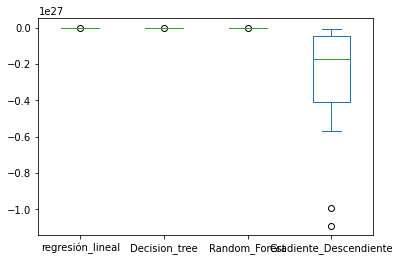

In [ ]:
mse = pd.concat([mse_df,mse_data], axis = 1)
mse.columns = ['Reg_Lin','Dec_tree','Rnd_For','Grade_Desc',
                 'Reg_Lin_data','Dec_tree_data','Rnd_For_data','Grade_Desc_data' ]

mse_data.plot(kind = "box")

Index(['regresión_lineal', 'Decision_tree', 'Random_Forest',
       'Gradiente_Descendiente'],
      dtype='object')

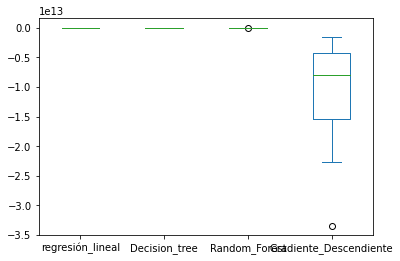

In [ ]:
rmse = pd.concat([rmse_df,rmse_data], axis = 1)
rmse.columns = ['Reg_Lin','Dec_tree','Rnd_For','Grade_Desc',
                 'Reg_Lin_data','Dec_tree_data','Rnd_For_data','Grade_Desc_data' ]

rmse_data[['regresión_lineal','Decision_tree','Random_Forest','Gradiente_Descendiente']].plot(kind = "box")
rmse_data.columns
#'regresión_lineal','Decision_tree','Random_Forest','Gradiente_Descendiente'

## **Comparaciòn de modelos**

In [ ]:
modelo_lr = cross_validate(m_lreg, data,y, cv = 20, scoring ="neg_mean_squared_error", return_train_score = True)
modelo_dt = cross_validate(m_dt, data, y, cv = 20, scoring ="neg_mean_squared_error", return_train_score = True)
modelo_rf = cross_validate(m_rf, data, y,cv = 20, scoring ="neg_mean_squared_error", return_train_score = True)
modelo_lr_r = cross_validate(m_lreg, data,y, cv = 20, scoring ="neg_root_mean_squared_error", return_train_score = True)
modelo_dt_r = cross_validate(m_dt, data, y, cv = 20, scoring ="neg_root_mean_squared_error", return_train_score = True)
modelo_rf_r = cross_validate(m_rf, data, y,cv = 20, scoring ="neg_root_mean_squared_error", return_train_score = True)

**MSE**

In [ ]:
modelo_lr_ev = pd.DataFrame(modelo_lr['train_score'])
modelo_dt_ev = pd.DataFrame(modelo_dt['train_score'])
modelo_rf_ev = pd.DataFrame(modelo_rf['train_score'])
comparacion_mse = pd.concat([modelo_lr_ev,modelo_dt_ev,modelo_rf_ev],axis = 1)
comparacion_mse.columns = ['modelo_lr_ev','modelo_dt_ev','modelo_rf_ev']

In [ ]:
comparacion_mse.mean()

modelo_lr_ev   -0.004249
modelo_dt_ev   -0.000177
modelo_rf_ev   -0.000834
dtype: float64

**RMSE**

In [ ]:
modelo_lr_ev_r = pd.DataFrame(modelo_lr_r['train_score'])
modelo_dt_ev_r = pd.DataFrame(modelo_dt_r['train_score'])
modelo_rf_ev_r = pd.DataFrame(modelo_rf_r['train_score'])
comparacion_rmse = pd.concat([modelo_lr_ev_r,modelo_dt_ev_r,modelo_rf_ev_r],axis = 1)
comparacion_rmse.columns = ['modelo_lr_ev_r','modelo_dt_ev_r','modelo_rf_ev_r']

In [ ]:
comparacion_rmse.mean()

modelo_lr_ev_r   -0.065184
modelo_dt_ev_r   -0.013310
modelo_rf_ev_r   -0.028933
dtype: float64

# **Afinamiento de hiperparámetros**

In [ ]:
param_grid = [{"splitter":["best","random"],     #The strategy used to choose the split at each node.
            "max_depth" : [10, 60],      # The maximum depth of the tree
           "min_samples_leaf":[10,100],    #The minimum number of samples required to split an internal node
           "min_weight_fraction_leaf":[0.1,0.2],      #The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node
           "max_features":["auto","log2","sqrt",None] #The number of features to consider when looking for the best split
           }]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

hyp_dec_tree = RandomizedSearchCV(m_dt, param_distributions = param_grid, n_iter = 30, scoring = "neg_root_mean_squared_error" )
hyp_dec_tree.fit(data,y)

resultados = hyp_dec_tree.cv_results_
hyp_dec_tree.best_params_
pd_resultados = pd.DataFrame(resultados)
print(pd_resultados[['params','mean_test_score']].min())
print('-------------------------')
print(pd_resultados[['params','mean_test_score']])

mean_test_score   -0.065624
dtype: float64
-------------------------
                                               params  mean_test_score
0   {'splitter': 'random', 'min_weight_fraction_le...        -0.065183
1   {'splitter': 'best', 'min_weight_fraction_leaf...        -0.065355
2   {'splitter': 'best', 'min_weight_fraction_leaf...        -0.065333
3   {'splitter': 'random', 'min_weight_fraction_le...        -0.065222
4   {'splitter': 'random', 'min_weight_fraction_le...        -0.065194
5   {'splitter': 'random', 'min_weight_fraction_le...        -0.065272
6   {'splitter': 'best', 'min_weight_fraction_leaf...        -0.065244
7   {'splitter': 'best', 'min_weight_fraction_leaf...        -0.065355
8   {'splitter': 'best', 'min_weight_fraction_leaf...        -0.065303
9   {'splitter': 'random', 'min_weight_fraction_le...        -0.065448
10  {'splitter': 'random', 'min_weight_fraction_le...        -0.065282
11  {'splitter': 'random', 'min_weight_fraction_le...        -0.065243
12  {'sp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
resultados = hyp_dec_tree.cv_results_
hyp_dec_tree.best_params_
pd_resultados = pd.DataFrame(resultados)
pd_resultados[['params','mean_test_score']]

dec_tree_final =  hyp_dec_tree.best_estimator_         ### Modelo con los mejores hiperparametros
dec_tree_final                 

DecisionTreeRegressor(max_depth=60, max_features='sqrt', min_samples_leaf=10,
                      min_weight_fraction_leaf=0.2, splitter='random')

# **Evaluación y selección del modelo**

In [ ]:
eva_mod1 = cross_validate(dec_tree_final,data,y,cv = 20, scoring ="neg_mean_squared_error", return_train_score = True)
eva_mod1 = pd.DataFrame(eva_mod1)
eva_mod1.mean()

fit_time       0.002781
score_time     0.001550
test_score    -0.004327
train_score   -0.004308
dtype: float64

In [ ]:
eva_mod2 = cross_validate(m_dt,data,y,cv = 20, scoring ="neg_mean_squared_error", return_train_score = True)
eva_mod2 = pd.DataFrame(eva_mod2)
eva_mod2.mean()

fit_time       0.046511
score_time     0.004322
test_score    -0.008855
train_score   -0.000177
dtype: float64